<a href="https://colab.research.google.com/github/BoopeshMohanraj/End-to-End-Data-Quality-Driven-Consumer-Segmentation-for-the-Running-Footwear-Market/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT -2**


**Objective**


The objective of this project is to identify and understand meaningful consumer segments within the running product market by leveraging unsupervised machine learning techniques. By clustering we aim to deliver actionable insights to enhance customer engagement, improve product design, and optimize marketing strategies for the running community.

**Team Members**

1. Boopesh Mohanraj
2. Sai Prashanth Vaditha

# Data

The attributes in the data:

* Record - Dataset record number
* ID - Unique identifier for each survey participant
* United States
* United Kingdom
* Japan
*  Valid
*  Invalid
*  Male
*  Female
*  Under 18
*  18-24
*  25-34
*  35-44
*  45-54
*  Above 55
*  Occasionally
*  Fairly regular
*  Generally 5+ times a week
* 1 Pair multi use
* 1 Pair single use
* 3+ pairs of running shoes
* 5+ pairs of running shoes
* Cush Not sure
* Cush Foam
* Cush Rubber
* Cush foam & rubber
* No races
* Same shoes
* Plat Rubber
* Plat Foam
* Carbon Plate
* Yoga & Pilates
* Only running
* Spinning
* Strength conditioning
* Swimming
* Hiking
* No complaints!
* Fast wear
* Too narrow
* Too heavy
* Not fashionable
* Bright & bold
* Soft pastels - pink, coral, purple
* Earth tones - greens, yellows, browns
* Neutrals - black & white
* Something normal

# Packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Footwear company dataset

In [ ]:
from google.colab import files
data = files.upload()

Saving survey_data.xlsx to survey_data (1).xlsx


In [ ]:
#Reading the excel file using pandas library and view first 5 records in the dataset
survey_data = pd.read_excel('survey_data.xlsx')
survey_data.head()

,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
# checking the shape of the dataset
survey_data.shape

(175, 47)

In [ ]:
# Renaming the column names for ease of use
new_column = {
    'S1r1': 'United States',
    'S1r2': 'United Kingdom',
    'S1r3': 'Japan',
    'S2r1': 'Valid',
    'S2r2': 'Invalid',
    'S3r1': 'Male',
    'S3r2': 'Female',
    'S4r1': 'Under_18',
    'S4r2': '18-24',
    'S4r3': '25-34',
    'S4r4': '35-44',
    'S4r5': '45-54',
    'S4r6': 'Above_55',
    'Q1r1': 'Occasional',
    'Q1r2': 'Fairly_regular',
    "Q1r3": '5+_a_week',
    'Q2r1': '1_pair_multi_use',
    'Q2r2': '1_pair_only_running',
    'Q2r3': '3+_pairs',
    'Q2r4': '5+_pairs',
    'Q3r1': 'cush_not_sure',
    'Q3r2': 'cush_Foam',
    'Q3r3': 'cush_Rubber',
    "Q3r4": 'cush_Foam&Rubber',
    'Q4r1': 'plat_noraces',
    'Q4r2': 'plat_sameshoes',
    'Q4r3': 'plat_rubber',
    'Q4r4': 'plat_foam',
    'Q4r5': 'plat_carbon',
    'Q5r1': 'yoga_pilates',
    'Q5r2': 'only_running',
    'Q5r3': 'spinning',
    'Q5r4': 'strength_conditioning',
    'Q5r5': 'swimming',
    'Q5r6': 'Hiking',
    'Q6r1': 'no_complaints',
    'Q6r2': 'fast_wear',
    'Q6r3': 'too_narrow',
    'Q6r4': 'too_heavy',
    'Q6r5': 'not_fashionable',
    'Q7r1': 'bright&bold',
    'Q7r2': 'soft_pastels',
    'Q7r3': 'Earth_tones',
    'Q7r4': 'neutrals',
    'Q7r5': 'something_normal'

}

# Renamed the columns
survey_data.rename(columns=new_column, inplace=True)

survey_data.head()

,record,id,United States,United Kingdom,Japan,Valid,Invalid,Male,Female,Under_18,...,no_complaints,fast_wear,too_narrow,too_heavy,not_fashionable,bright&bold,soft_pastels,Earth_tones,neutrals,something_normal
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
survey_data.tail()

,record,id,United States,United Kingdom,Japan,Valid,Invalid,Male,Female,Under_18,...,no_complaints,fast_wear,too_narrow,too_heavy,not_fashionable,bright&bold,soft_pastels,Earth_tones,neutrals,something_normal
170,171,4436816,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
171,172,2124150,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
172,173,1218187,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
173,174,5498558,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
174,175,4601749,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   record                 175 non-null    int64
 1   id                     175 non-null    int64
 2   United States          175 non-null    int64
 3   United Kingdom         175 non-null    int64
 4   Japan                  175 non-null    int64
 5   Valid                  175 non-null    int64
 6   Invalid                175 non-null    int64
 7   Male                   175 non-null    int64
 8   Female                 175 non-null    int64
 9   Under_18               175 non-null    int64
 10  18-24                  175 non-null    int64
 11  25-34                  175 non-null    int64
 12  35-44                  175 non-null    int64
 13  45-54                  175 non-null    int64
 14  Above_55               175 non-null    int64
 15  Occasional             175 non-null    i

In [ ]:
#checking for data redundancy
duplicate_data = survey_data.duplicated().sum()
print("Duplicate data: ",duplicate_data)

Duplicate data:  0


In [ ]:

# Load the dataset
file_path = 'survey_data.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Check for duplicate 'id' values
duplicate_ids = df[df.duplicated('id')]

# Display duplicate 'id' values
print(duplicate_ids)

Empty DataFrame
Columns: [record, id, S1r1, S1r2, S1r3, S2r1, S2r2, S3r1, S3r2, S4r1, S4r2, S4r3, S4r4, S4r5, S4r6, Q1r1, Q1r2, Q1r3, Q2r1, Q2r2, Q2r3, Q2r4, Q3r1, Q3r2, Q3r3, Q3r4, Q4r1, Q4r2, Q4r3, Q4r4, Q4r5, Q5r1, Q5r2, Q5r3, Q5r4, Q5r5, Q5r6, Q6r1, Q6r2, Q6r3, Q6r4, Q6r5, Q7r1, Q7r2, Q7r3, Q7r4, Q7r5]
Index: []

[0 rows x 47 columns]


In [ ]:
# Drop non-relevant columns
df_clean = survey_data.drop(columns=['record', 'id'])

In [ ]:
df_clean
CLEAN_SURVEY_DATA = df_clean

# Exploratory Data Analysis

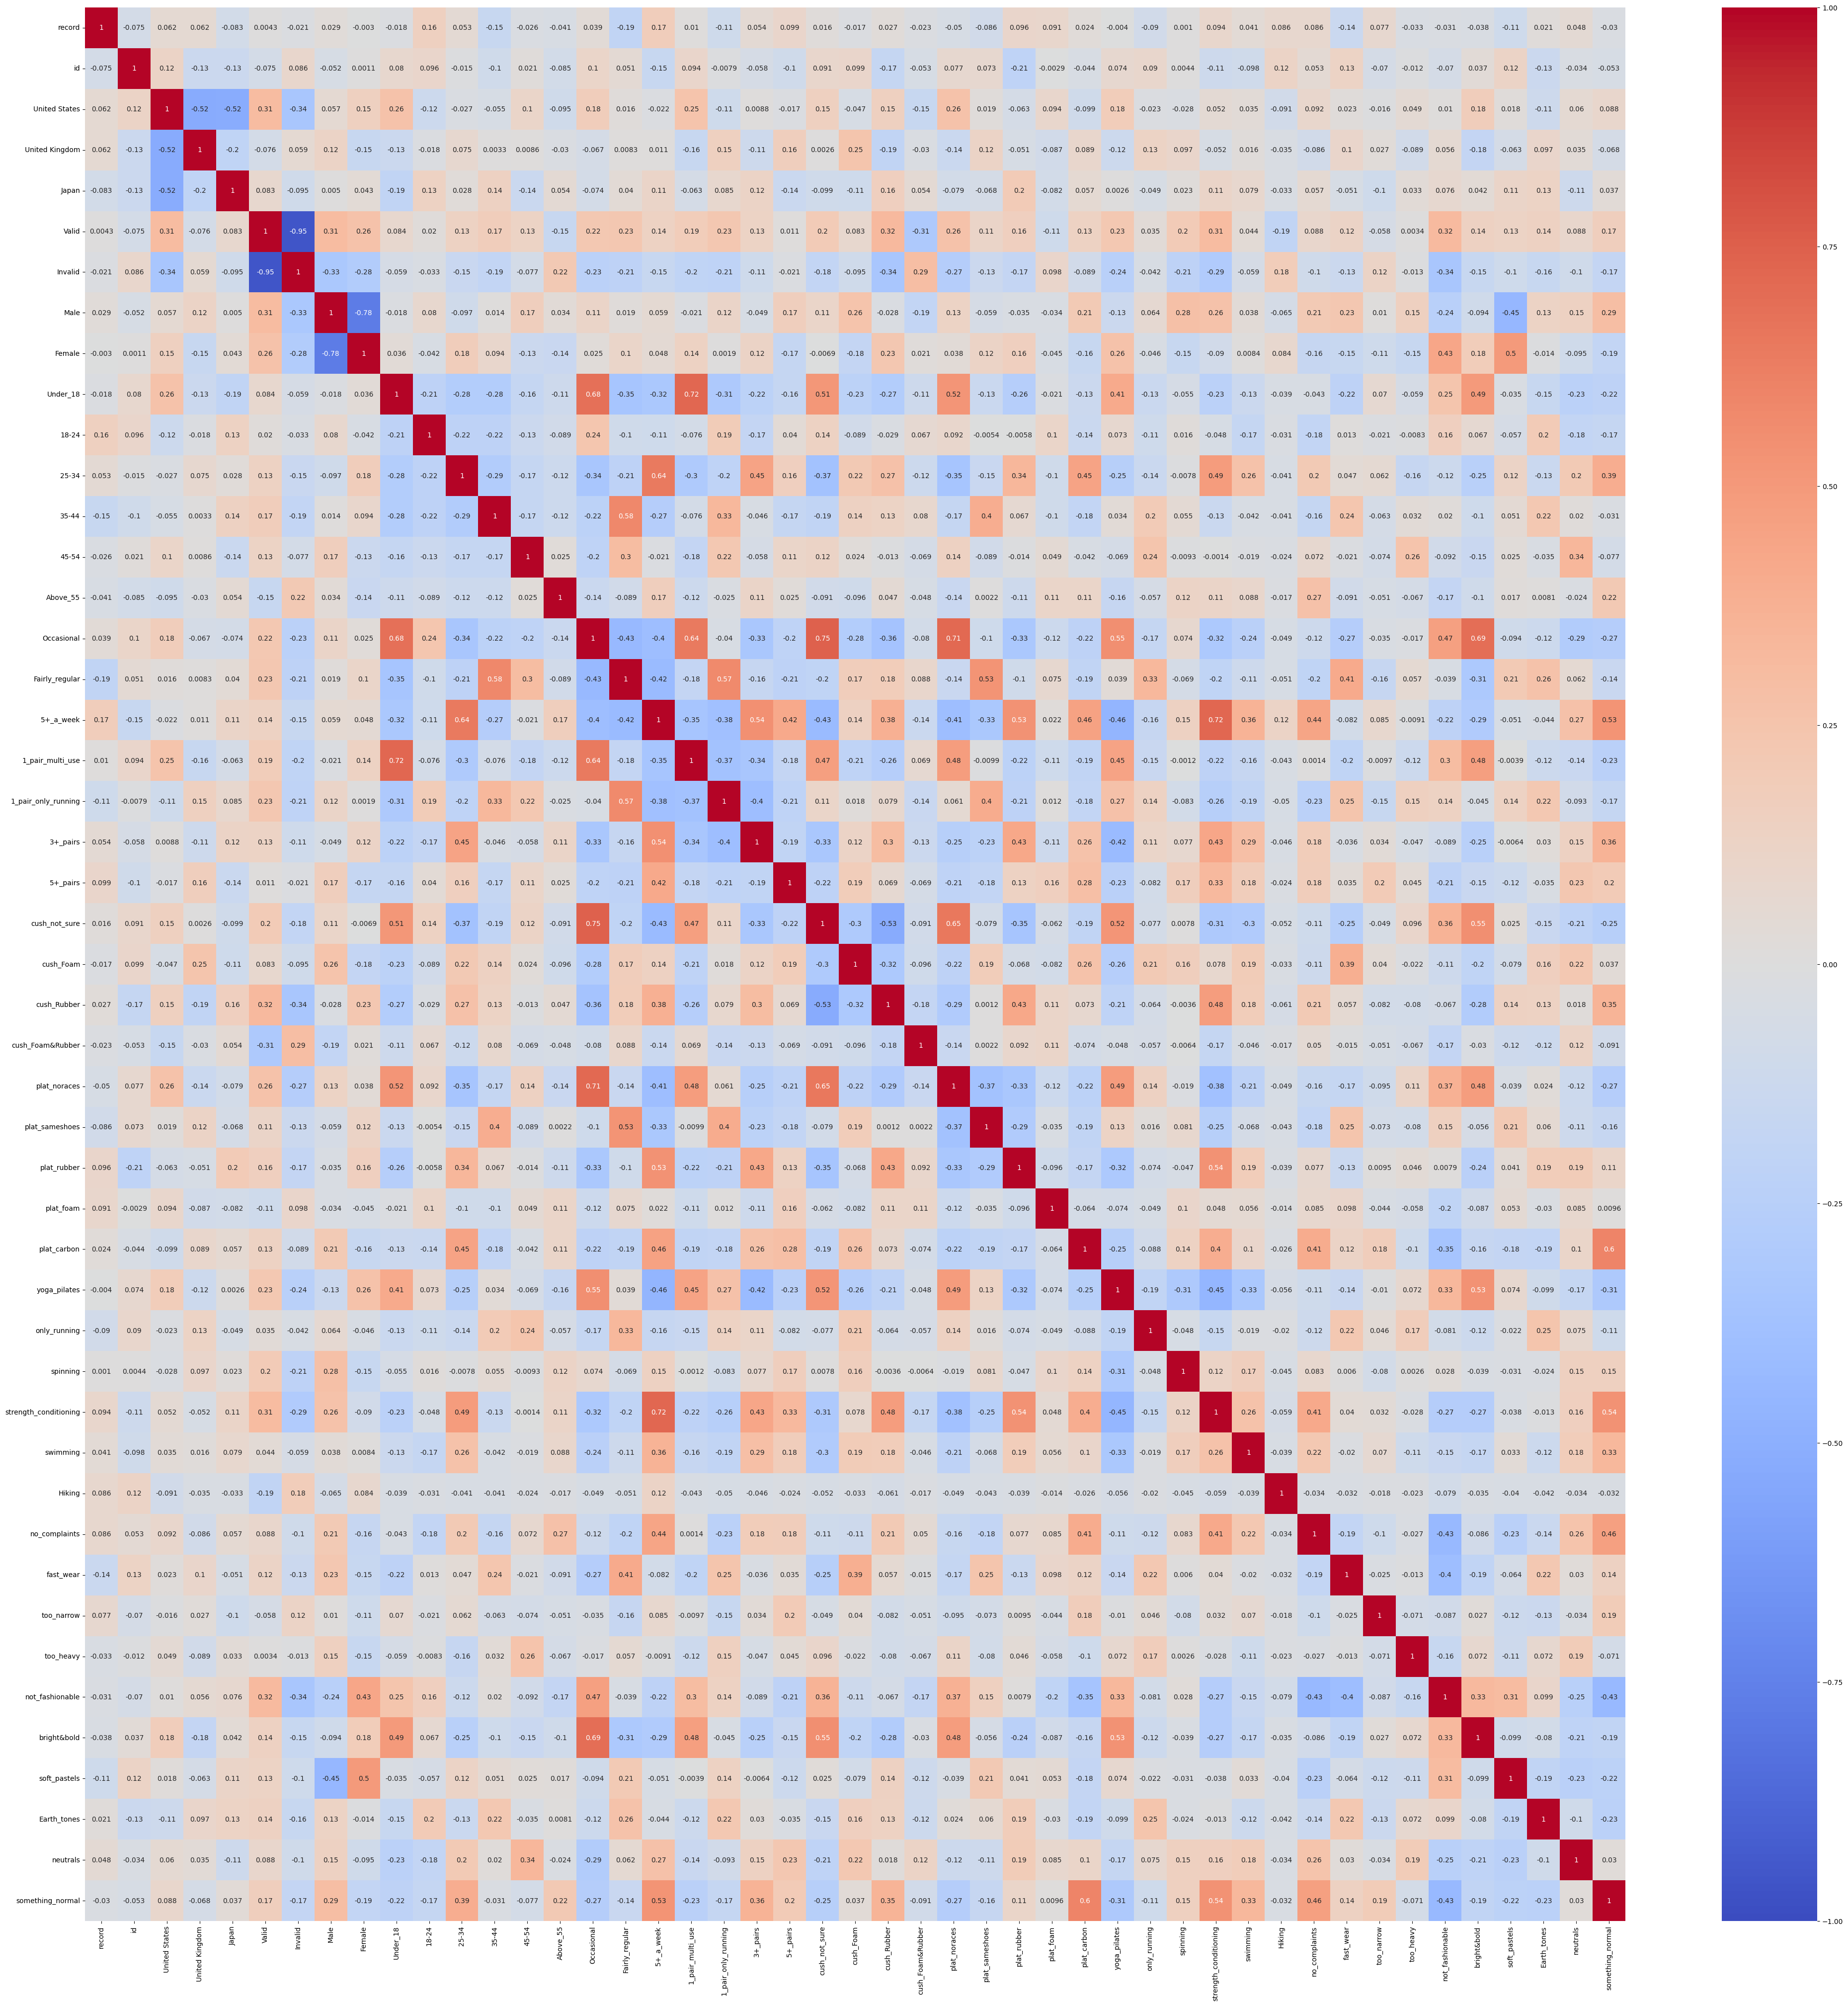

In [ ]:
correlations = CLEAN_SURVEY_DATA.corr()

# Correlation Heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(survey_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title
plt.show()

# Similarity matrix

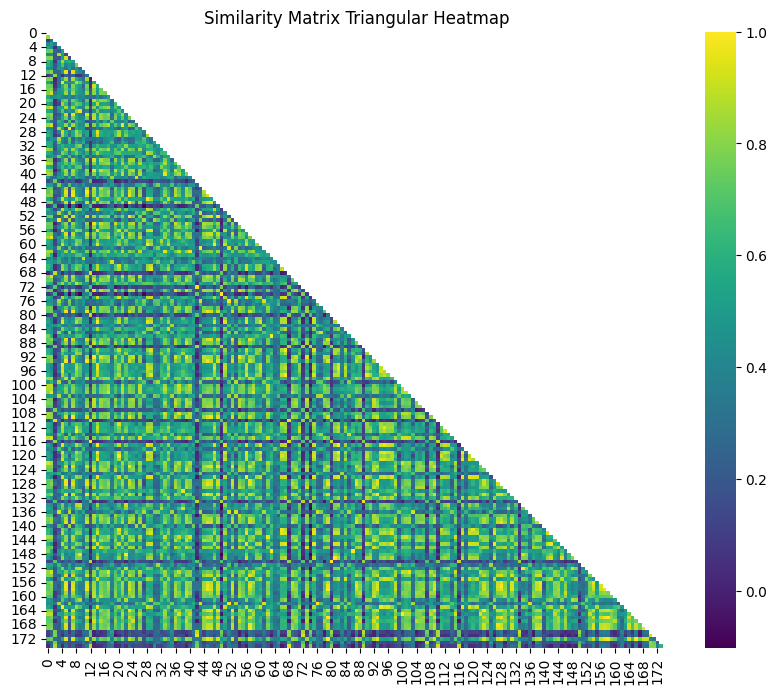

In [ ]:
# Calculate the similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(CLEAN_SURVEY_DATA)
#since the dataset contains binary responses cosine similarity would be a good choice
#Cosine similarity measures the cosine of the angle between two vectors, which works well for binary data where you're interested in comparing
# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=CLEAN_SURVEY_DATA.index, columns=CLEAN_SURVEY_DATA.index)
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(similarity_df, dtype=bool))
# Plot the similarity matrix as a triangular heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, mask=mask, cmap='viridis', annot=False)
plt.title('Similarity Matrix Triangular Heatmap')
plt.show()



* Since the dataset contains binary responses cosine similarity would be a good choice
* Cosine similarity measures the cosine of the angle between two vectors, which works well for binary data where you're interested in comparing patterns of responses



# Choosing between the clustering methods

# Elbow Method

The "elbow" point represents the k value where the SSE reduction starts to level off, indicating the optimal number of clusters.

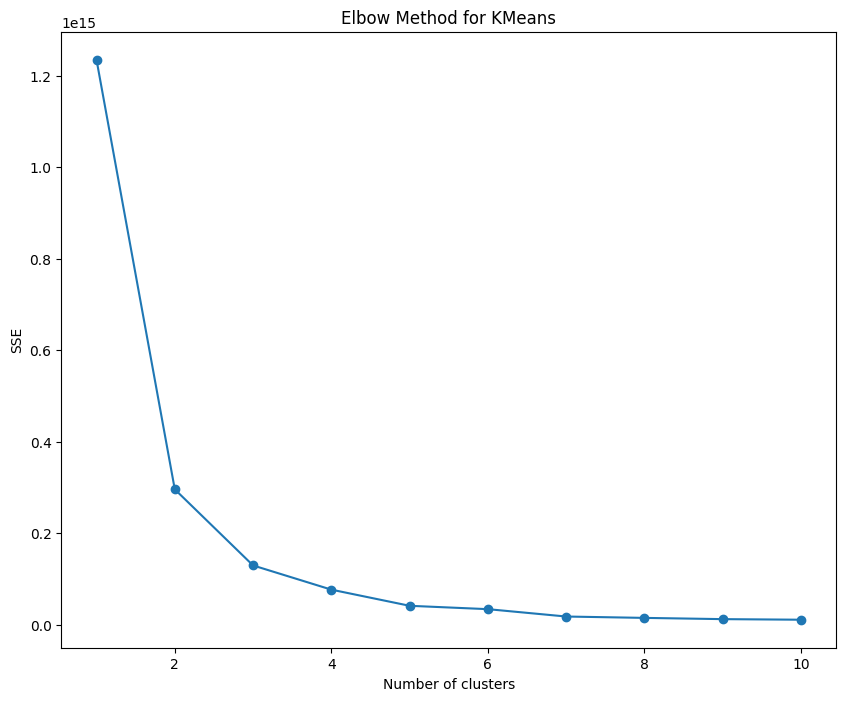

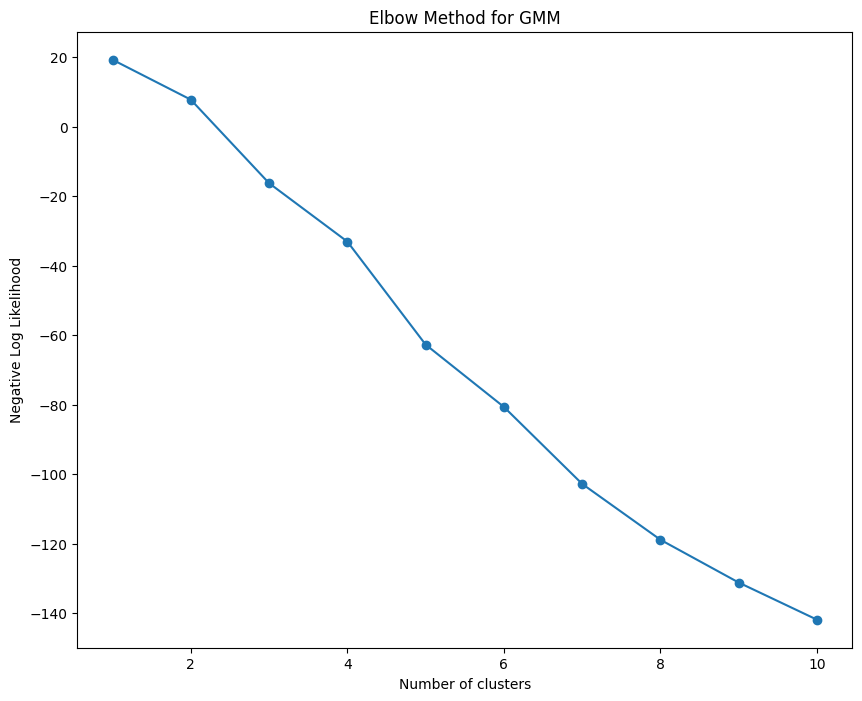

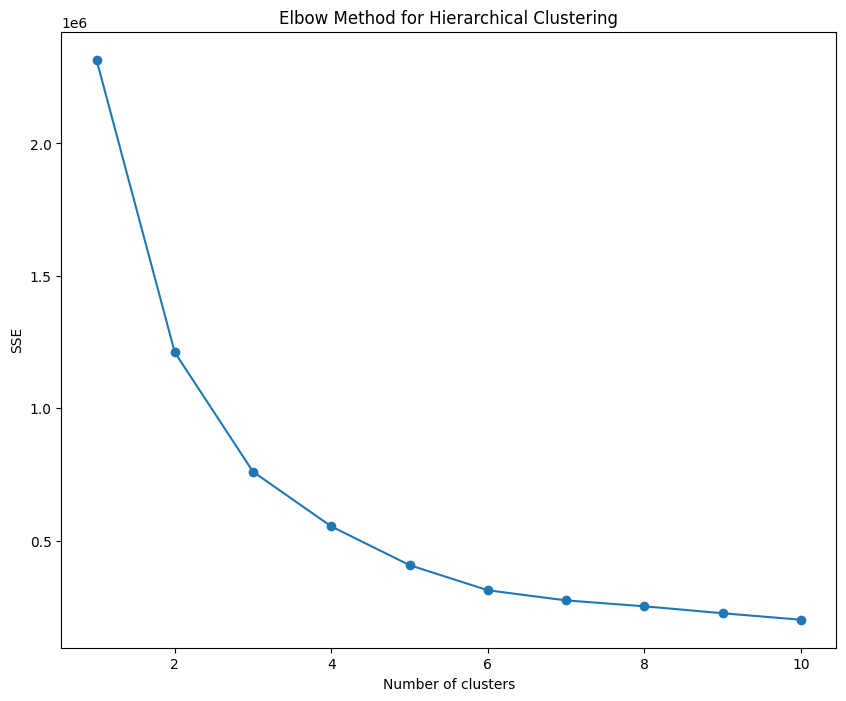

In [ ]:

# Elbow method for KMeans
sse_kmeans = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse_kmeans.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse_kmeans, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Elbow method for GMM
sse_gmm = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df)
    sse_gmm.append(-gmm.score(df))

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse_gmm, marker='o')
plt.title('Elbow Method for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Negative Log Likelihood')
plt.show()

# Elbow method for Hierarchical Clustering

sse_hierarchical = []
for k in range(1, 11):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=k)
    hierarchical_clustering.fit(df)
    cluster_centers = np.array([df[hierarchical_clustering.labels_ == i].mean(axis=0) for i in range(k)])
    sse_hierarchical.append(sum(np.min(cdist(df, cluster_centers, 'euclidean'), axis=1)) / df.shape[0])

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse_hierarchical, marker='o')
plt.title('Elbow Method for Hierarchical Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()



* Elbow method for DBSCAN is not applicable as it does not require the number of clusters to be specified

* Elbow method for PCA is not applicable as it is a dimensionality reduction technique and not a clustering algorithm

The elbow method was not preferred because it focuses only on minimizing within-cluster variance and does not assess cluster separation, making it less reliable for evaluating cluster quality in binary or complex data

# Silhouette Score

Silhouette scores are used to evaluate the quality of clustering by measuring how well each data point fits within its assigned cluster while ensuring adequate separation from other clusters, providing a robust metric for determining the optimal number of clusters.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Define the clustering models
kmeans = KMeans(n_clusters=4, random_state=42)
hierarchical_clustering = AgglomerativeClustering(n_clusters=4)
dbscan = DBSCAN(eps=0.5, min_samples=5)
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the models and predict labels
kmeans_labels = kmeans.fit_predict(df)
hierarchical_labels = hierarchical_clustering.fit_predict(df)
dbscan_labels = dbscan.fit_predict(df)
gmm_labels = gmm.fit_predict(df)

# Calculate Silhouette Scores
kmeans_silhouette = silhouette_score(df, kmeans_labels)
hierarchical_silhouette = silhouette_score(df, hierarchical_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_labels_cleaned = dbscan_labels[dbscan_labels != -1]
    df_cleaned = df[dbscan_labels != -1]
    dbscan_silhouette = silhouette_score(df_cleaned, dbscan_labels_cleaned)
else:
    dbscan_silhouette = -1

gmm_silhouette = silhouette_score(df, gmm_labels)

# Display the Silhouette Scores
silhouette_scores = {
    'KMeans': kmeans_silhouette,
    'Hierarchical Clustering': hierarchical_silhouette,
    'DBSCAN': dbscan_silhouette,
    'GMM': gmm_silhouette,
}

print(silhouette_scores)


{'KMeans': 0.5567140672447551, 'Hierarchical Clustering': 0.6157668468332859, 'DBSCAN': -1, 'GMM': 0.5567140672447551}




* We proceeded with GMM as it had the second-highest silhouette score and Hierarchical Clustering, which performed well compared to DBSCAN

* Despite having the highhest score K-Means was avoided based on IBM's recommendation, as it is not suitable for binary data due to its reliance on Euclidean distance. (https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided )



# Checking Outliers

Outliers were considered as they can significantly impact clustering results, affecting both cluster cohesion and separation

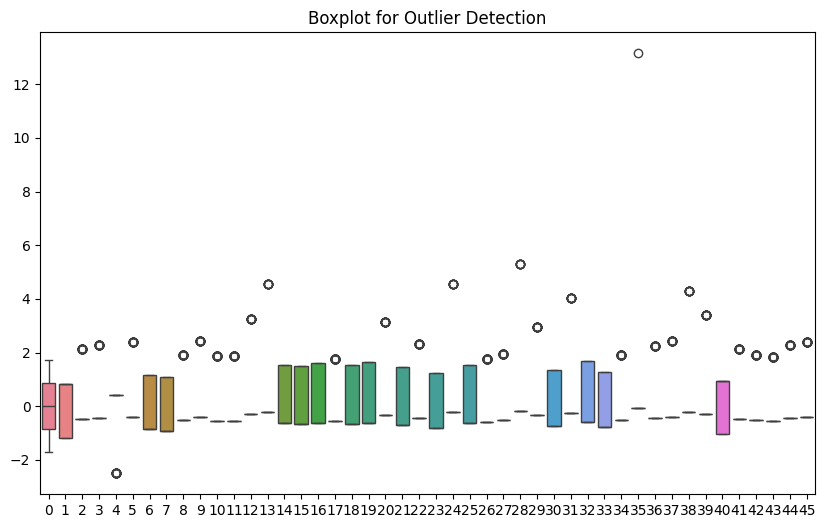

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=scaled_data)
plt.title("Boxplot for Outlier Detection")
plt.show()

The boxplot reveals that there are very few outliers in the dataset, indicating that the majority of the data points are well-distributed within the expected range and the impact of outliers on clustering results is minimal.

# Comparing the choosen clustering methods

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN # Import DBSCAN from sklearn.cluster

# Hierarchical Clustering

Hierarchical clustering is a method of clustering that builds a hierarchy of clusters by either iteratively merging smaller clusters into larger ones (agglomerative) or splitting larger clusters into smaller ones (divisive), providing a tree-like structure to represent data relationships.

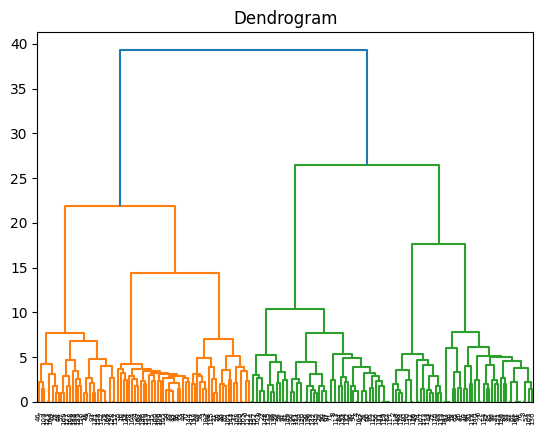

Cluster Labels: [ 7  5 13 20 12  3 18  1 11  8 17  3 13  4 12  4  4  5 16  4 10  5  8  1
  4 16  5 18 12 10 17 19  9  6 12 20  4  7  9  4  6 16 14 20  4  3  1 12
  1 14 12 20  1 20  4  4 10  2  5  9 12 20  6 15 17 16 10 10 13  5  4 11
 14  4 14 10 20 19  4  3 13  9 12 20 12 19 15  3  4 14 10  9  4  3 12 12
 12 10  5 19  7  6  5 20  4  4  4 14  7  1 13 10 12 11 19  5 13 12 17 12
 10 12  7  1  4 20 10  2  3  4  9  3 12 14  8  9 20  4  2  2 18 10 10  6
  4 10  4 15  8  9 13 19  8  5  2 12  2  3  3  4  4  8 20 12  1  7  3  4
  2  2 14 14  3 14 13]


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Convert your survey data to a NumPy array for clustering

data_array = CLEAN_SURVEY_DATA.values

# Perform Hierarchical Clustering
Z = linkage(data_array, method='ward')  # Pass the NumPy array
dendrogram(Z)
plt.title("Dendrogram")
plt.show()

# Choose clusters from the dendrogram
clusters = fcluster(Z, t=5, criterion='distance')  # Adjust t for more or fewer clusters
print("Cluster Labels:", clusters)

# GMM - Gaussian Mixture

Gaussian Mixture Modeling (GMM) is a probabilistic clustering method that assumes data is generated from a mixture of Gaussian distributions, allowing for flexible cluster shapes and the ability to estimate the likelihood of data points belonging to each cluster

In [ ]:
gmm = GaussianMixture(n_components = 8, random_state = 1)
gmm.fit(CLEAN_SURVEY_DATA)


CLEAN_SURVEY_DATA['GmmLabels'] = gmm.predict(CLEAN_SURVEY_DATA)

CLEAN_SURVEY_DATA.GmmLabels.value_counts()

,count
GmmLabels,
3,36
1,29
4,26
5,20
7,19
0,18
2,17
6,10


In [ ]:
# Calculate summary statistics for clusters
cluster_summary = CLEAN_SURVEY_DATA.groupby('GmmLabels').mean()

# Display the summary
print("Cluster Characteristics (Mean Values):")
print(cluster_summary)



Cluster Characteristics (Mean Values):
           United States  United Kingdom     Japan     Valid  Invalid  \
GmmLabels                                                               
0               0.500000        0.166667  0.333333  1.000000      0.0   
1               0.689655        0.103448  0.206897  1.000000      0.0   
2               0.411765        0.235294  0.352941  1.000000      0.0   
3               0.916667        0.083333  0.000000  1.000000      0.0   
4               0.192308        0.230769  0.076923  0.076923      1.0   
5               0.450000        0.350000  0.200000  1.000000      0.0   
6               1.000000        0.000000  0.000000  1.000000      0.0   
7               0.526316        0.263158  0.210526  1.000000      0.0   

               Male    Female  Under_18     18-24     25-34  ...  too_narrow  \
GmmLabels                                                    ...               
0          0.000000  1.000000  0.000000  0.166667  0.833333  ...    0.

This output provides summary statistics for each cluster identified by GMM, revealing the mean values of various attributes for the data points within each cluster. These statistics are critical for understanding the distinct characteristics of each segment, enabling targeted strategies.

# Comparing GMM and Hierarchical Clusters

We are comparing both GMM and Hierarchical Clustering to identify the most effective method for segmenting the dataset

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to the dataset (excluding cluster labels)
pca = PCA(n_components=2)

# Check if 'HierarchicalLabels' column exists before dropping it
columns_to_drop = ['GmmLabels']
if 'HierarchicalLabels' in CLEAN_SURVEY_DATA.columns:
    columns_to_drop.append('HierarchicalLabels')

pca_result = pca.fit_transform(CLEAN_SURVEY_DATA.drop(columns=columns_to_drop))

# Add PCA results to the DataFrame
CLEAN_SURVEY_DATA['PCA1'] = pca_result[:, 0]
CLEAN_SURVEY_DATA['PCA2'] = pca_result[:, 1]

pca_result

array([[-8.33938228e-02,  1.50361496e+00],
       [-1.30108152e+00,  1.76265952e+00],
       [-1.61132622e+00, -2.09063042e-01],
       [ 4.58699570e-01,  2.49847332e+00],
       [ 2.57509204e+00, -7.44439937e-01],
       [-2.29403036e+00, -1.50378807e+00],
       [ 1.19919102e+00,  2.30671990e+00],
       [-2.17950308e+00, -1.07308233e+00],
       [ 2.29897236e+00, -2.52590085e-03],
       [ 2.11550172e+00,  8.71317289e-03],
       [ 1.55021312e-01,  5.14368891e-01],
       [-2.64484550e+00, -1.44321532e+00],
       [-1.76792377e+00, -5.71517718e-01],
       [-2.46657824e-01,  2.66973093e-01],
       [ 2.90885340e+00, -1.38594753e+00],
       [-3.83720628e-02,  2.12620605e-01],
       [-1.20931041e-01,  1.03924597e+00],
       [-1.28362493e+00,  9.34469554e-01],
       [ 4.52134539e-02,  7.50484388e-01],
       [ 6.09643176e-01, -2.76723996e-01],
       [ 1.86637798e+00, -2.12763671e+00],
       [-1.26332288e+00,  1.52202630e+00],
       [ 2.10424987e+00, -1.17641965e-02],
       [-2.

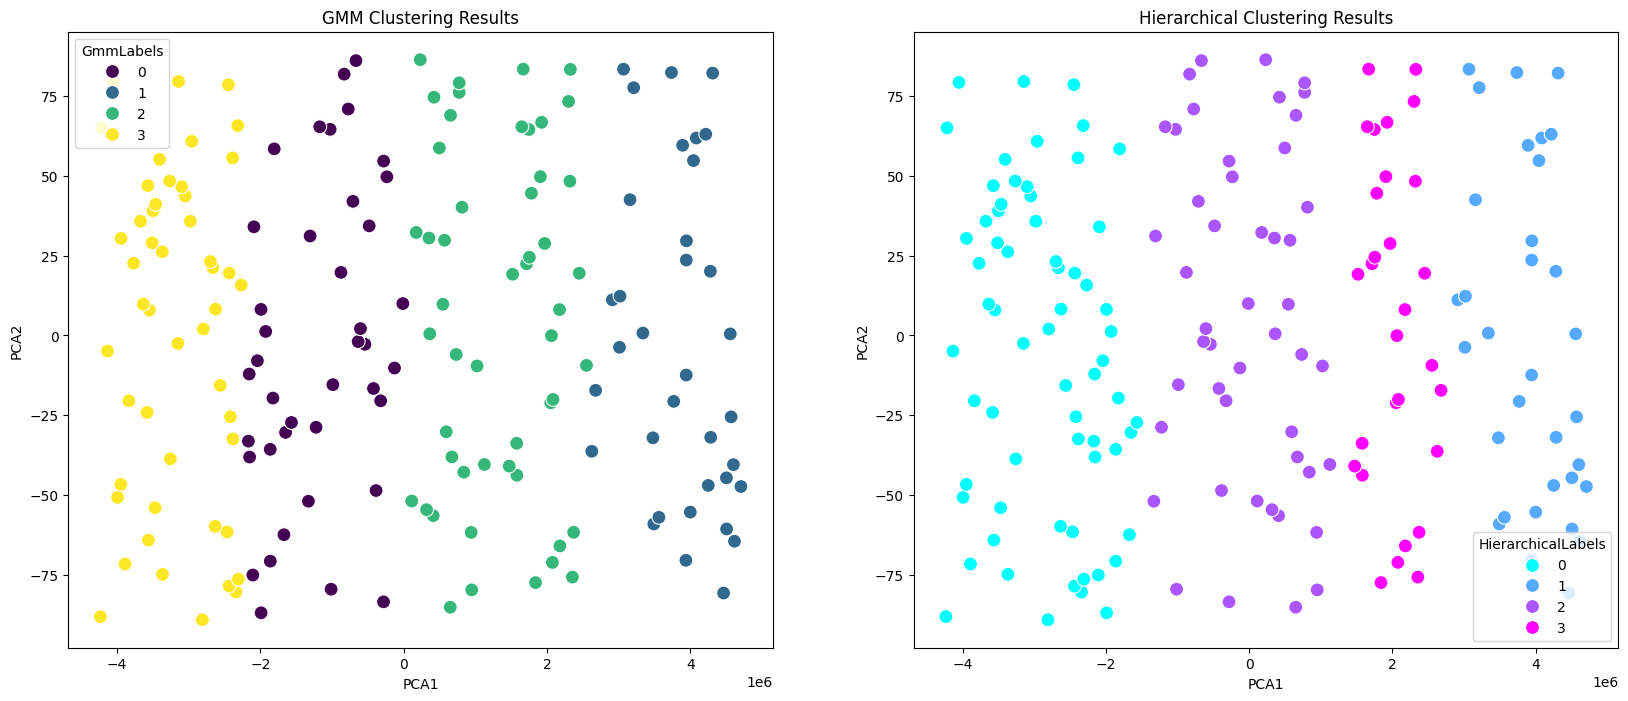

In [ ]:
# Define the Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)

# Fit the model and predict labels
gmm_labels = gmm.fit_predict(df)

# Define the Hierarchical Clustering model
hierarchical_clustering = AgglomerativeClustering(n_clusters=4)

# Fit the model and predict labels
hierarchical_labels = hierarchical_clustering.fit_predict(df)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['GmmLabels'] = gmm_labels
pca_df['HierarchicalLabels'] = hierarchical_labels

# Plotting the clusters for GMM and Hierarchical Clustering
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# GMM visualization
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='GmmLabels',
    palette='viridis',
    s=100,
    ax=ax[0]
)
ax[0].set_title('GMM Clustering Results')

# Hierarchical visualization
sns.scatterplot(
    data=pca_df,
    x='PCA1',
    y='PCA2',
    hue='HierarchicalLabels',
    palette='cool',
    s=100,
    ax=ax[1]
)
ax[1].set_title('Hierarchical Clustering Results')

plt.show()

# Conclusion



*  GMM produces evenly distributed clusters with flexible shapes, making them more uniform and easier to interpret for segmentation, while Hierarchical Clustering forms rigid boundaries that may overlap or require refinement to define cluster separation
*  GMM is recommended for its adaptability and well-separated clusters, aligning with actionable customer segmentation goals



**Cluster's found:**


* Cluster 1: Predominantly females in the United States, aged 25-34, with a preference for "soft pastels" and complaints about products being "not fashionable."
*  Cluster 2: Female-dominated, scattered across regions, with varied age groups and notable dissatisfaction regarding "not fashionable" products.


* Cluster 3: Male-dominated, primarily young (18-24), showing minimal complaints but slight dissatisfaction with "too heavy" products.
* Cluster 4: Mixed gender, younger demographic with preferences for "bright & bold" and complaints about "not fashionable."



*  Cluster 5: Small group with "valid" responses but mixed demographics, fewer complaints, and lower product engagement.
*  Cluster 6: Male-dominated group, highly dissatisfied with "fast wear" but with a strong preference for "Earth tones."



*   Cluster 7: Almost entirely from the United States, with high interest in "something normal" products and fewer complaints.
*   Cluster 8: This cluster includes consumers who engage in strength conditioning, prefer something normal, and have preferences for specific product features














**Recommendation's & Strategies**


**For product portfolio:**

* Collaborate with fashion designers and influencers to create exclusive, trendy designs tailored for both male and female consumers
* Launch limited-edition designs inspired by top athletes, leveraging their brand appeal to attract both fans and performance-focused customer
* Create two distinct product categories: Simple and Versatile for everyday users and Fashion-Forward for trend-conscious consumers
* Develop aesthetically pleasing designs that blend functionality with style to appeal to consumers who value both fashion and practicality
* Design products specifically for exercise and active lifestyles, emphasizing durability, comfortable cushioning, and lightweight materials



**For Marketing Strategies:**

* Create regional and gender-specific advertisements with catchy colors and phrases
* Collaborate with renowned athletes to endorse and promote performance-focused products
* Partner with fitness events, marathons, or local sports activities for  promotions to showcase performance-driven products and build brand recognition
* Run social media campaigns with influencers to promote limited-edition designs and fashionable products, creating buzz and exclusivity


**Is Personalization Profitability:**

 I honestly believe personalization is highly profitable. For instance, when I think about one of my favorite brands, Nike, they offer personalized options like customizing colors, designs, and even adding symbols or names through engravings. This level of personalization tempts me to interact more, experimenting with my own designs on their products. Such offerings significantly enhance customer engagement and allow companies to charge a premium for personalized designs, boosting revenue. Overall, personalization fosters loyalty, satisfaction, and retention, encouraging customers to return for more, thereby driving long-term growth.

# Reference's & Resource's


* https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided
* Chatgpt 4o
* Github Co-pilot